<a href="https://colab.research.google.com/github/ofgkts/Portfolio-Projects/blob/main/survey_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023 3'rd quarter Turkiye Software engineers salary survey
purpose of this notebook is cleaning and analyzing data before tableu i take this data from https://twitter.com/AltugAkgul/status/1687848297329790976?s=20  

In [1]:
#importing necessary librarires for the starting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
survey=pd.read_csv('/content/drive/MyDrive/proje/Omer Code/projects/cs_survey/2023_II_-_Yazılım_Sektörü_M2023-08-05_11_01_23.csv')
df=survey.copy()
df.head()

,Submission Date,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,Kazancınız hangi para biriminde?,Maaş tipi,Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?,Maaş / Aylık Türk Lirası cinsinden
0,"Ağu 5, 2023",Erkek,Yemek kartı\nYol / yakıt yardımı\nPersonel ser...,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",Türk Lirası,Net,%21-%35,70.001 TL - 85.000 TL
1,"Ağu 5, 2023",Erkek,Yemek kartı\nTamamlayıcı sağlık sigortası\nBel...,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,Türk Lirası,Net,%11-%20,20.001 TL - 25.000 TL
2,"Ağu 5, 2023",Erkek,Yemek kartı\nPersonel servisi,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",Türk Lirası,Net,%21-%35,11.402 TL ve altı
3,"Ağu 5, 2023",Erkek,"Belirli günlerde izin(doğum günü, regl izni gibi)",Türkiye,60 Tokat,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,Türk Lirası,Net,%36-%50,25.001 TL - 30.000 TL
4,"Ağu 5, 2023",Kadın,Yemek kartı,Türkiye,16 Bursa,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,Türk Lirası,Net,%21-%35,30.001 TL - 37.000 TL


## starting with basic analyze

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Submission Date                                                  2465 non-null   object
 1   Cinsiyet                                                         2465 non-null   object
 2   Yan haklarınız                                                   2465 non-null   object
 3   Şirketiniz hangi lokasyon merkezli?                              2465 non-null   object
 4   Şirketiniz hangi şehirde? (Eğer Türkiye ise)                     2163 non-null   object
 5   Çalışma şekliniz nedir?                                          2465 non-null   object
 6   Şirketinizin çalışan sayısı nedir?                               2456 non-null   object
 7   Hangi pozisyonda çalışıyorsunuz?                   

In [3]:
df.isna().sum()

Submission Date                                                      0
Cinsiyet                                                             0
Yan haklarınız                                                       0
Şirketiniz hangi lokasyon merkezli?                                  0
Şirketiniz hangi şehirde? (Eğer Türkiye ise)                       302
Çalışma şekliniz nedir?                                              0
Şirketinizin çalışan sayısı nedir?                                   9
Hangi pozisyonda çalışıyorsunuz?                                     0
Seviyeniz nedir?                                                     0
Deneyim                                                              0
Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?      0
Kazancınız hangi para biriminde?                                     0
Maaş tipi                                                            0
Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?             471
Maaş /

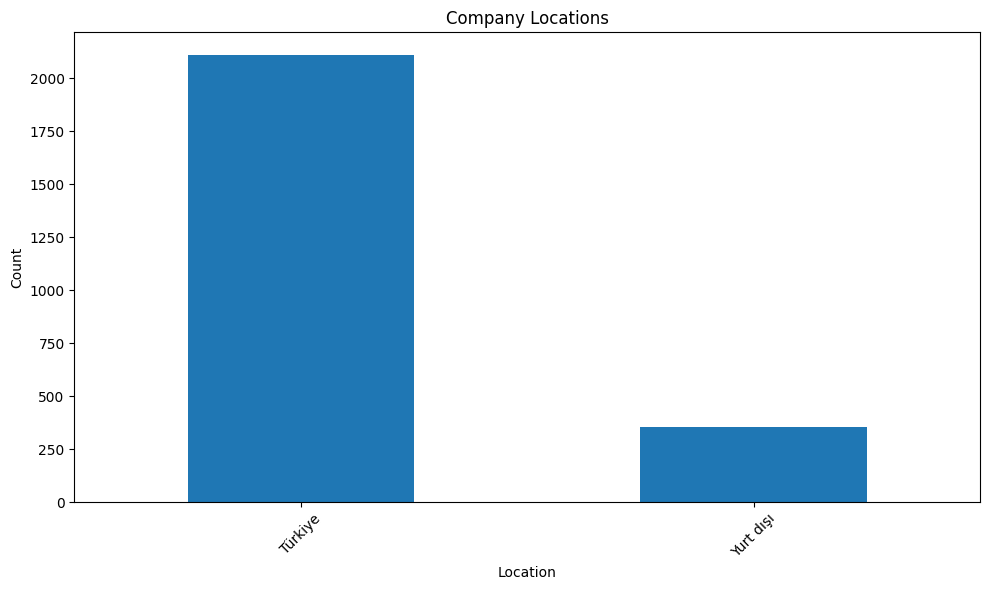

In [4]:
# Replace 'Şirketiniz hangi lokasyon merkezli?' with the exact column name from your data
location_counts = df['Şirketiniz hangi lokasyon merkezli?'].value_counts()

# Create a bar chart using matplotlib
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
location_counts.plot(kind='bar')
plt.title('Company Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [8]:
dummies=df['Yan haklarınız'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)

<ipython-input-8-bd5555eb9583>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies=df['Yan haklarınız'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)


In [9]:
dummies.replace({0: 'yok', 1: 'var'}, inplace=True)

In [10]:
df1 = pd.concat([df, dummies], axis=1)

In [12]:
df1.drop('Yan haklarınız',axis=1,inplace=True)
df1.head()

,Submission Date,Cinsiyet,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,...,Spor salonu üyeliği / indirimi,Tamamlayıcı sağlık sigortası,Tıbbi izin,Yemek kartı,Yol / yakıt yardımı,Özel günlerce dhediye çeki,İşsizlik sigortası,İşçi tazminatı,Şirket aracı,Şirket telefonu
0,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",...,yok,var,yok,var,var,yok,yok,yok,yok,yok
1,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,...,yok,var,yok,var,yok,yok,yok,yok,yok,yok
2,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",...,yok,yok,yok,var,yok,yok,yok,yok,yok,yok
3,"Ağu 5, 2023",Erkek,Türkiye,60 Tokat,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,...,yok,yok,yok,yok,yok,yok,yok,yok,yok,yok
4,"Ağu 5, 2023",Kadın,Türkiye,16 Bursa,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,...,yok,yok,yok,var,yok,yok,yok,yok,yok,yok


In [18]:
df1['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)

<ipython-input-18-10e593fd1833>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df1['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)


,Adobe CC araçları,C# / .NET Framework,"C, C++",ChatGPT,"Cloud araçları ( AWS, Azure, GCP vs)",DevOps araçları,Docker / containerd / Hyper-V / LXC / Podman,Figma / XD ve diğer tasarım araçları,Flutter,Golang,...,NoSQL,PHP,Python,R,Ruby,Rust,SAP,SQL,Salesforce,Swift
0,0,1,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2462,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2463,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
column_name = 'Tech_Languages_Column'

# Split the values and create a DataFrame with value counts
values = df['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack()
value_counts = values.value_counts()


In [20]:
value_counts

Javascript / Typescript ve bağlı framework'ler             942
SQL                                                        870
Jira / Asana / Trello / Bitrix24 ve benzeri PM araçları    621
C# / .NET Framework                                        604
Java ve bağlı framework'ler                                551
Cloud araçları ( AWS, Azure, GCP vs)                       490
ChatGPT                                                    456
Python                                                     448
Linux                                                      443
DevOps araçları                                            435
Docker / containerd / Hyper-V / LXC / Podman               427
Microsoft Office Araçları                                  367
Kubernetes                                                 256
Figma / XD ve diğer tasarım araçları                       240
NoSQL                                                      239
PHP                                                    